In [4]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import Table, Column
%matplotlib inline

In [5]:
print 'Reading files'
w = Table.read('wen.csv') 
r = Table.read('redmapper.fits') 
k = Table.read('koester2007.vot', format='votable')
wz = Table.read('wazp.fits')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k)
print 'Wzap:', len(wz)

Reading files
Wen: 132684
Rykoff: 26111
Koester: 13823
Wzap: 18089


In [6]:
NSIDE = 32

In [7]:
# Phi e theta do Wen
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [8]:
#Phi e theta do Rykoff
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [9]:
#Phi e theta do Koester
phi_k = np.deg2rad(k['RAJ2000'])
theta_k = np.deg2rad(90.-k['DEJ2000'])

In [10]:
#Phi e theta do Wzap
phi_wz = np.deg2rad(wz['ra_init'])
theta_wz = np.deg2rad(90.-wz['dec_init'])

In [11]:
# Pixels do Wen
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)

In [12]:
# Pixels do Rykoff
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)

In [13]:
#Pixels do Koester
kpix = hp.ang2pix(NSIDE, theta_k, phi_k)

In [14]:
#Pixels do Wzap
wzpix = hp.ang2pix(NSIDE, theta_wz, phi_wz)

In [15]:
#Retira os numeros de pixels repetidos
uwpix = np.unique(wpix)
urpix = np.unique(rpix)
ukpix = np.unique(kpix)
uwzpix = np.unique(wzpix)
print len(wpix), len(uwpix)
print len(rpix), len(urpix)
print len(kpix), len(ukpix)
print len(wzpix), len(uwzpix)

132684 4900
26111 3288
13823 2379
18089 89


In [19]:
# Match de wpix com rpix
lista = []
for wp in uwpix: 
    for rp in urpix:
        if wp==rp:
            lista.append(wp)

In [20]:
print len(lista)

3288


In [24]:
#Match da lista com o kpix
lista_m = []
for kp in ukpix:
    for lp in lista:
        if lp==kp:
            lista_m.append(kp)

In [25]:
print len(lista_m)

2311


In [26]:
#Match da lista com o kpix
lista_match = []
for wzp in uwzpix:
    for lm in lista_m:
        if lm==wzp:
            lista_match.append(wzp)

In [28]:
print len(lista_match)

51


In [45]:
#sysmap = np.zeros(hp.nside2npix(NSIDE),dtype=np.float32) +hp.UNSEEN
mmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
wmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
rmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
kmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
wzmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN

In [46]:
wmap[wpix] = 1
rmap[rpix] = 1
kmap[kpix] = 1 
wzmap[wzpix] = 1
mmap[lista_match] = 1

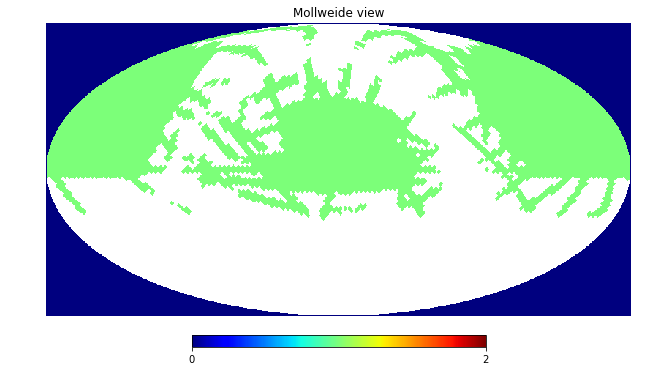

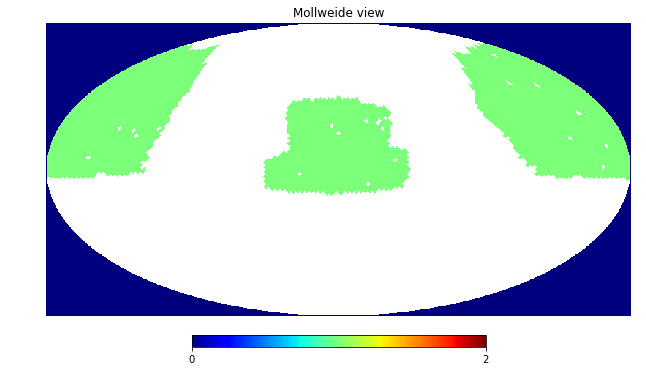

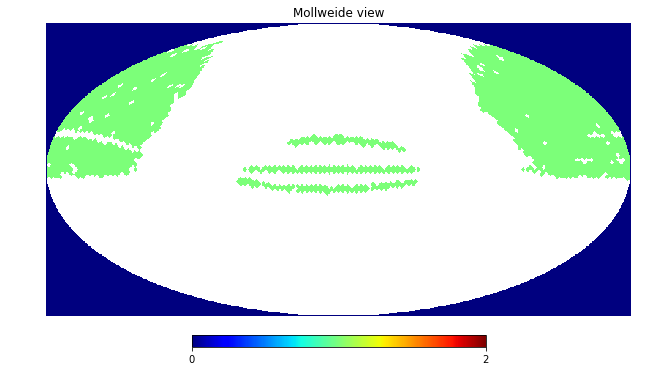

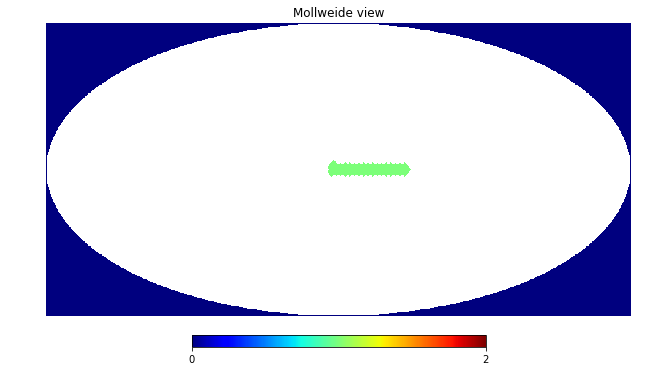

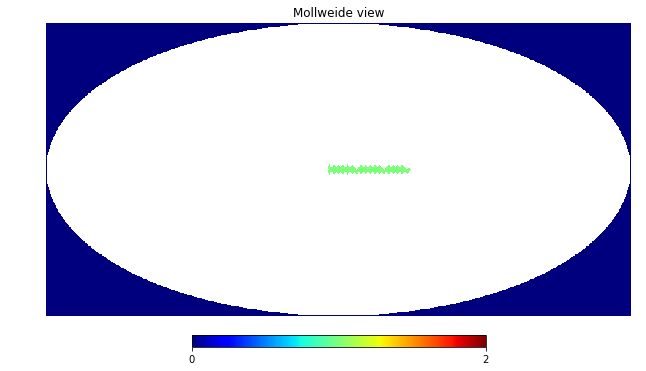

In [47]:
hp.mollview(wmap, fig=1, cmap='jet')
hp.mollview(rmap, fig=2, cmap='jet')
hp.mollview(kmap, fig=3, cmap='jet')
hp.mollview(wzmap, fig=4, cmap='jet')
hp.mollview(mmap, fig=5, cmap='jet')

In [48]:
# wen
mask_w = np.zeros(len(wpix), int)
goodies = np.array(lista_match)
for i,wp in enumerate(wpix):
    for good in goodies:
        if wp == good:
            mask_w[i] = 1

In [49]:
print mask_w
print len(mask_w), sum(mask_w)

[0 0 0 ..., 1 0 0]
132684 1805


In [50]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_iw = []
for i in range(0,len(mask_w)):
    if mask_w[i]!=0:
        match_iw.append(i)
print len(match_iw)

1805


In [51]:
# Aplicando os indices no wen
new_w = w[match_iw]

In [52]:
# rykoff
mask_r = np.zeros(len(rpix), int)
goodies = np.array(lista_match)
for i,rp in enumerate(rpix):
    for good in goodies:
        if rp == good:
            mask_r[i] = 1

In [53]:
print mask_r
print len(mask_r), sum(mask_r)

[0 0 0 ..., 0 0 0]
26111 497


In [54]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_ir = []
for i in range(0,len(mask_r)):
    if mask_r[i]!=0:
        match_ir.append(i)
print len(match_ir)

497


In [55]:
# Aplicando os indices no rykoff
new_r = r[match_ir]

In [56]:
# koester
mask_k = np.zeros(len(kpix), int)
goodies = np.array(lista_match)
for i,kp in enumerate(kpix):
    for good in goodies:
        if kp == good:
            mask_k[i] = 1

In [57]:
print mask_k
print len(mask_k), sum(mask_k)

[0 0 0 ..., 0 0 0]
13823 260


In [58]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_ik = []
for i in range(0,len(mask_k)):
    if mask_k[i]!=0:
        match_ik.append(i)
print len(match_ik)

260


In [59]:
# Aplicando os indices no koester
new_k = k[match_ik]

In [61]:
# wazp
mask_wz = np.zeros(len(wzpix), int)
goodies = np.array(lista_match)
for i,wzp in enumerate(wzpix):
    for good in goodies:
        if wzp == good:
            mask_wz[i] = 1

In [62]:
print mask_wz
print len(mask_wz), sum(mask_wz)

[1 1 1 ..., 0 0 0]
18089 15880


In [63]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_iwz = []
for i in range(0,len(mask_wz)):
    if mask_wz[i]!=0:
        match_iwz.append(i)
print len(match_iwz)

15880


In [65]:
# Aplicando os indices no wazp
new_wz = wz[match_iwz]

In [67]:
new_w.write('new_wen.fits', format='fits')

In [68]:
new_r.write('new_rykoff.fits', format='fits')

In [69]:
new_k.write('new_koester.fits', format='fits')

In [70]:
new_wz.write('new_wazp.fits', format='fits')